Inside Main function
Printing existing headers : ['airbnb_id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_nights.1', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30'

df_data_name sort :  ['aparthotel in san francisco · 1 bedroom · 1 bed · 1 bath'
 'aparthotel in san francisco · 1 bedroom · 1 bed · 1 shared bath'
 'aparthotel in san francisco · 1 bedroom · 2 beds · 1 bath' ...
 'villa in san francisco · ★4.94 · 4 bedrooms · 4 beds · 3.5 baths'
 'villa in san francisco · ★5.0 · 2 bedrooms · 5 beds · 1.5 baths'
 'villa in san francisco · ★5.0 · 6 bedrooms · 6 beds · 3.5 baths']
['serviced apartment in san francisco · ★4.87 · 1 bedroom · 2 beds · 1 bath'
 'rental unit in san francisco · ★4.88 · 2 bedrooms · 2 beds · 2 baths'
 'rental unit in san francisco · ★4.70 · 1 bedroom · 1 bed · 4 shared baths'
 ... 'condo in san francisco · ★new · 3 bedrooms · 4 beds · 2.5 baths'
 'hotel in san francisco · ★new · 1 bedroom · 3 beds · 2 baths'
 'hotel in san francisco · ★new · 1 bedroom · 1 bed · 2 baths']
San Francisco, CA 14
San Francisco, CA 14
San Francisco, CA 14
San Francisco, CA 14
San Francisco, CA 14
San Francisco, CA 14
San Francisco, CA 14
San Francisc

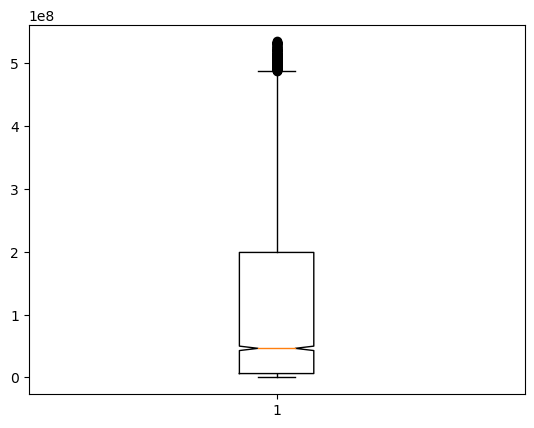

In [62]:
"""
Week 7 & 8 Term End Project - Milestone 3
"""

from __future__ import print_function
from itertools import zip_longest

import csv
import logging
import sys
import numpy as np
import pandas as pd
import random
import thinkplot
import thinkstats2
import datetime
import regression
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
from bs4 import BeautifulSoup
import pandas as pd
import re
from datetime import date
from Levenshtein import distance
import plotly.express as px
import warnings
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
warnings.filterwarnings('ignore', category=FutureWarning)

def ReadData(filename):
    ### Read in the Airbnb data set (given as a .csv file) from the local directory

    df = pd.read_csv(filename)

    # printing the headers
    names = []
    for line in df:
        var=line.split(":")[0]
        names.append(var)

    print("Printing existing headers :", names);

    return df

# This function will change the parameter passed to follow naming standard
def naming_convention(name):
   char_to_replace = {
       " ":"_",
       "-":"_",
       "(":"_",
       ")":"_"
   }
   # strip method will remove \n and any leading/trailing whitespaces
   better_name = name.strip().lower()
   # Replace string place holders according to values in dictionary 
   better_name = better_name.translate(str.maketrans(char_to_replace))
   return better_name.rstrip('_')

# to Replace Headers
def Replace_Headers(df, filename):
    df.head()

    # adding header 
    column_names = ['Airbnb_Id', 'Listing_URL', 'Scrape_Id', 'Last_Scraped','Source','Name','Description','Neighborhood_Overview','Picture_URL','Host_Id','Host_URL','Host_Name','Host_Since','Host_Location','Host_About','Host_Response_Time','Host_Response_Rate','Host_Acceptance_Rate',
'Host_Is_Superhost','Host_Thumbnail_URL','Host_Picture_URL', 'Host_Neighbourhood', 'Host_Listings_Count', 'Host_Total_Listings_Count', 'Host_Verifications', 'Host_Has_Profile_Pic', 'Host_Identity_Verified', 'Neighbourhood', 'Neighbourhood_Cleansed',
'Neighbourhood_Group_Cleansed', 'Latitude', 'Longitude', 'Property_type', 'Room_type', 'Accommodates', 'Bathrooms', 'Bathrooms_text', 'Bedrooms', 'Beds', 'Amenities', 'Price', 'Minimum_Nights', 'Maximum_nights', 'Minimum_Nights', 'Maximum_Minimum_Nights', 'Minimum_Maximum_Nights', 
'Maximum_Maximum_Nights', 'Minimum_Nights_Avg_ntm', 'Maximum_Nights_Avg_ntm', 'Calendar_Updated', 'Has_Availability', 'Availability_30', 'Availability_60', 'Availability_90', 
'Availability_365', 'Calendar_Last_Scraped', 'Number_of_reviews', 'Number_of_reviews_ltm', 'Number_of_reviews_l30d', 'First_review', 'Last_review', 'Review_scores_rating', 'Review_scores_accuracy', 'Review_scores_cleanliness', 'Review_scores_checkin',
'Review_scores_communication', 'Review_scores_location', 'Review_scores_value', 'License', 'Instant_bookable', 'Calculated_host_listings_count', 'Calculated_host_listings_count_entire_homes', 'Calculated_host_listings_count_private_rooms',
'Calculated_host_listings_count_shared_rooms', 'Reviews_per_month'] 


    new_column_names = [naming_convention(x) for x in column_names]
    #print("new_column_names :", new_column_names)

     # Removing empty column and Area column from list
    invalid_columns = ['Reviews_per_month','']
    new_column_names = [ele for ele in new_column_names if ele not in invalid_columns]
    new_column_names
    print("new_column_names :", new_column_names)

    # converting data frame to csv 
    df.to_csv(filename, header=new_column_names, index=False) 

    # remove spaces in columns name and replace with underscores
    df.columns = df.columns.str.replace(' ','_')
    print("df.columns remove spaces :", df.columns)

    # changing all colunmn names to lower case
    df.rename(columns=str.lower, inplace=True)
    print("df.columns lower case :", df.columns)

    # replace long column names to shorter ones
    df.rename(columns={"calculated_host_listings_count_shared_rooms" : "hostlistings_shared_rooms_count", 
                            "Calculated_host_listings_count_entire_homes" : "host_listings_entire_homes_count",
                            "Calculated_host_listings_count_private_rooms" : "hostlistings_private_rooms_count"}, inplace=True)

     # Check if any of the column contains missing value NaN
    print("df.isna().sum(axis=0) :", df.isna().sum(axis=0))
    
    # display modified csv file 
    modifiedData = pd.read_csv(filename) 
    print('\nModified file:') 
    print("modifiedData :", modifiedData) 
    return modifiedData

def Format_Data_Readable_Format(data_df):
    print("dtypes ",data_df.dtypes)

    # Convert DataFrame column 'calculated_host_listings_count_shared_rooms' from string to float
    data_df['calculated_host_listings_count_shared_rooms'] = pd.to_numeric(data_df["calculated_host_listings_count_shared_rooms"], downcast="float")
    print("dtypes after rename : ",data_df.columns)

    # Convert each value of the column 'listing_url' to a string
    data_df['listing_url'] = pd.to_numeric(data_df['listing_url'], errors='coerce')

    # Replace empty string ('') with np.nan before convertion
    data_df['review_scores_rating']=data_df.review_scores_rating.replace('',np.nan)
    data_df['review_scores_accuracy']=data_df.review_scores_accuracy.replace('',np.nan)
    data_df['review_scores_cleanliness']=data_df.review_scores_cleanliness.replace('',np.nan)
    data_df['review_scores_checkin']=data_df.review_scores_checkin.replace('',np.nan)
    data_df['review_scores_communication']=data_df.review_scores_communication.replace('',np.nan)
    data_df['review_scores_location']=data_df.review_scores_location.replace('',np.nan)
    data_df['reviews_per_month']=data_df.reviews_per_month.replace('',np.nan)
    data_df['number_of_reviews']=data_df.number_of_reviews.replace('',np.nan)

    data_df['number_of_reviews_ltm']=data_df.number_of_reviews_ltm.replace('',np.nan)
    data_df['number_of_reviews_l30d']=data_df.number_of_reviews_l30d.replace('',np.nan)

    data_df['review_scores_value']=data_df.review_scores_value.replace('',np.nan)
    data_df['host_id']=data_df.host_id.replace('',np.nan)
    

    print(data_df.dtypes)

    # Remove any any text starting from parenthisis "("" to end using regex
    data_df['name'] = data_df['name'].apply(lambda x: re.sub("\(.*", "",x))

    # Removing any leading and trailing spaces and coverting state names to uppercase
    data_df['name'] = data_df['name'].str.strip()
    data_df['description'] = data_df['description'].str.strip()
    data_df['neighborhood_overview'] = data_df['neighborhood_overview'].str.strip()
    data_df['name'].head()
    
    return data_df

def Find_Duplicates(df_data):

    df_data.head()
    # To find duplicates on specific column 'host_id'
    print("df_data.duplicated column 'host_id' ", df_data.duplicated(subset=['host_id']))
    print("df_data.duplicated column 'host_name' ", df_data.duplicated(subset=['host_name']))
    print("df_data.duplicated column 'name' ", df_data.duplicated(subset=['name']))
    print("df_data.duplicated column 'description' ", df_data.duplicated(subset=['description']))
 
    print("Scrape Id is duplictated - {}".format(any(df_data.scrape_id.duplicated())))
    print("Name is duplictated - {}".format(any(df_data.name.duplicated())))
    print("Host Url is duplictated - {}".format(any(df_data.host_url.duplicated())))
    print("Host Name is duplictated - {}".format(any(df_data.host_name.duplicated())))
    print("Host Id is duplictated - {}".format(any(df_data.host_id.duplicated())))
    print("Host Location is duplictated - {}".format(any(df_data.host_location.duplicated())))
    print("Host Neighbourhood is duplictated - {}".format(any(df_data.host_neighbourhood.duplicated())))
    print("Host Verifications is duplictated - {}".format(any(df_data.host_verifications.duplicated())))

    # DROP duplicates data
    df_data.drop_duplicates(subset=['host_id', 'host_name', 'name', 'description'], keep='last')

    # By default it removes duplicate rows based on all columns.
    df_data.drop_duplicates()

    return df_data

def Identify_Outliers_BadData(df_data):

    ### Check if any essential column contains NaN.

    print("The column Scrape Id contains NaN - %r " % df_data.scrape_id.isnull().values.any())
    print("The column Name contains NaN - %s " % df_data.name.isnull().values.any())
    print("The column Host URL contains NaN - %s " % df_data.host_url.isnull().values.any())
    print("The column Host Name contains NaN - %s " % df_data.host_name.isnull().values.any())
    print("The column Host Id contains NaN - %s " % df_data.host_id.isnull().values.any())
    print("The column Host Location contains NaN - %s " % df_data.host_location.isnull().values.any())
    print("The column Host Neighbourhood contains NaN - %s " % df_data.host_neighbourhood.isnull().values.any())
    print("The column Host Verifications contains NaN - %s " % df_data.host_verifications.isnull().values.any())

    # Create a box plot to check for outliers.
    plt.boxplot(df_data.host_id, notch=True)

    # Find outliers and view the data distribution using a histogram
    fig = px.histogram(df_data, x='host_id')
    fig.show()

    # Find multivariate outliers using a scatter plot
    fig_1 = px.scatter(x=df_data['host_id'], y=df_data['airbnb_id'])
    fig_1.show()

def Fix_Casing_InconsistentValues(df_data):

    # Lower name column. Fix capitalization inconsistencies
    df_data['name'] = df_data['name'].str.lower()
    df_data['description'] = df_data['description'].str.lower()
    df_data['host_name'] = df_data['host_name'].str.lower()
    df_data['neighborhood_overview'] = df_data['neighborhood_overview'].str.lower()
    df_data['host_about'] = df_data['host_about'].str.lower()
    df_data['host_neighbourhood'] = df_data['host_neighbourhood'].str.lower()

    # Verify changes have been effected
    df_data_name = df_data['name'].unique()

    # Fix whitespace if any

    df_data_name.sort()
    print("df_data_name sort : ", df_data_name)

    # Remove white spaces from `dest_size`
    df_data['name'] = df_data['name'].str.strip()
    df_data['description'] = df_data['description'].str.strip()
    df_data['host_name'] = df_data['host_name'].str.strip()
    df_data['neighborhood_overview'] = df_data['neighborhood_overview'].str.strip()
    df_data['host_about'] = df_data['host_about'].str.strip()
    df_data['host_neighbourhood'] = df_data['host_neighbourhood'].str.strip()
    # Verify changes have been effected
    print(df_data['name'].unique())

    return df_data

def Conduct_Fuzzy_Matching(df_data):

    #Use fuzzy matching to correct inconsistent data entry

    # get all the unique values in the 'dest_region' column
    df_data_name = df_data['name'].unique()
    # sort them alphabetically and then take a closer look
    df_data_name.sort()

    host_location = 'Miami, FL1'
    for row in df_data['host_location']:
        print("{} {}".format(row, distance(host_location, row)))

    # Create a list of choices for name matching
    name_choices = df_data['name'].tolist()

    # Apply the function to each row in the 'Name' column
    result = df_data['name'].apply(lambda x: find_similar_name(x, name_choices))

    # Display the DataFrame with closest matches
    print('result :', result)
    
    return df_data

# Define a function to find similar names
def find_similar_name(name, choices):
    return process.extractOne(name, choices)

def main():
    print('Inside Main function')

    ### Read in the Airbnb project dataset (given as a .csv file) from the local direction:
    filename="listings.csv"
    df = ReadData(filename);

    ### To replace headers on the data sets
    df_data = Replace_Headers(df, filename)

    ### Format data into a more readable format
    df_data = Format_Data_Readable_Format(df_data)

    ### Identify duplicates
    df_data = Find_Duplicates(df_data)

    ### Identify outliers and bad data
    Identify_Outliers_BadData(df_data)

    ### Fix casing or inconsistent values
    df_data = Fix_Casing_InconsistentValues(df_data)

    ### Conduct Fuzzy Matching
    Conduct_Fuzzy_Matching(df_data)

if __name__ == "__main__":
    main()